# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari _kaggle_ [Link Kaggle](#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


# **2. Import Library**


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.


In [87]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**


Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan


In [75]:
df = pd.read_csv("../breast_cancer_data.csv")

In [76]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Daftar kolom: {list(df.columns)}")

Jumlah kolom: 33
Daftar kolom: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


In [60]:
features = [col for col in df.columns if col not in (
    'id', 'diagnosis', 'Unnamed: 32')]

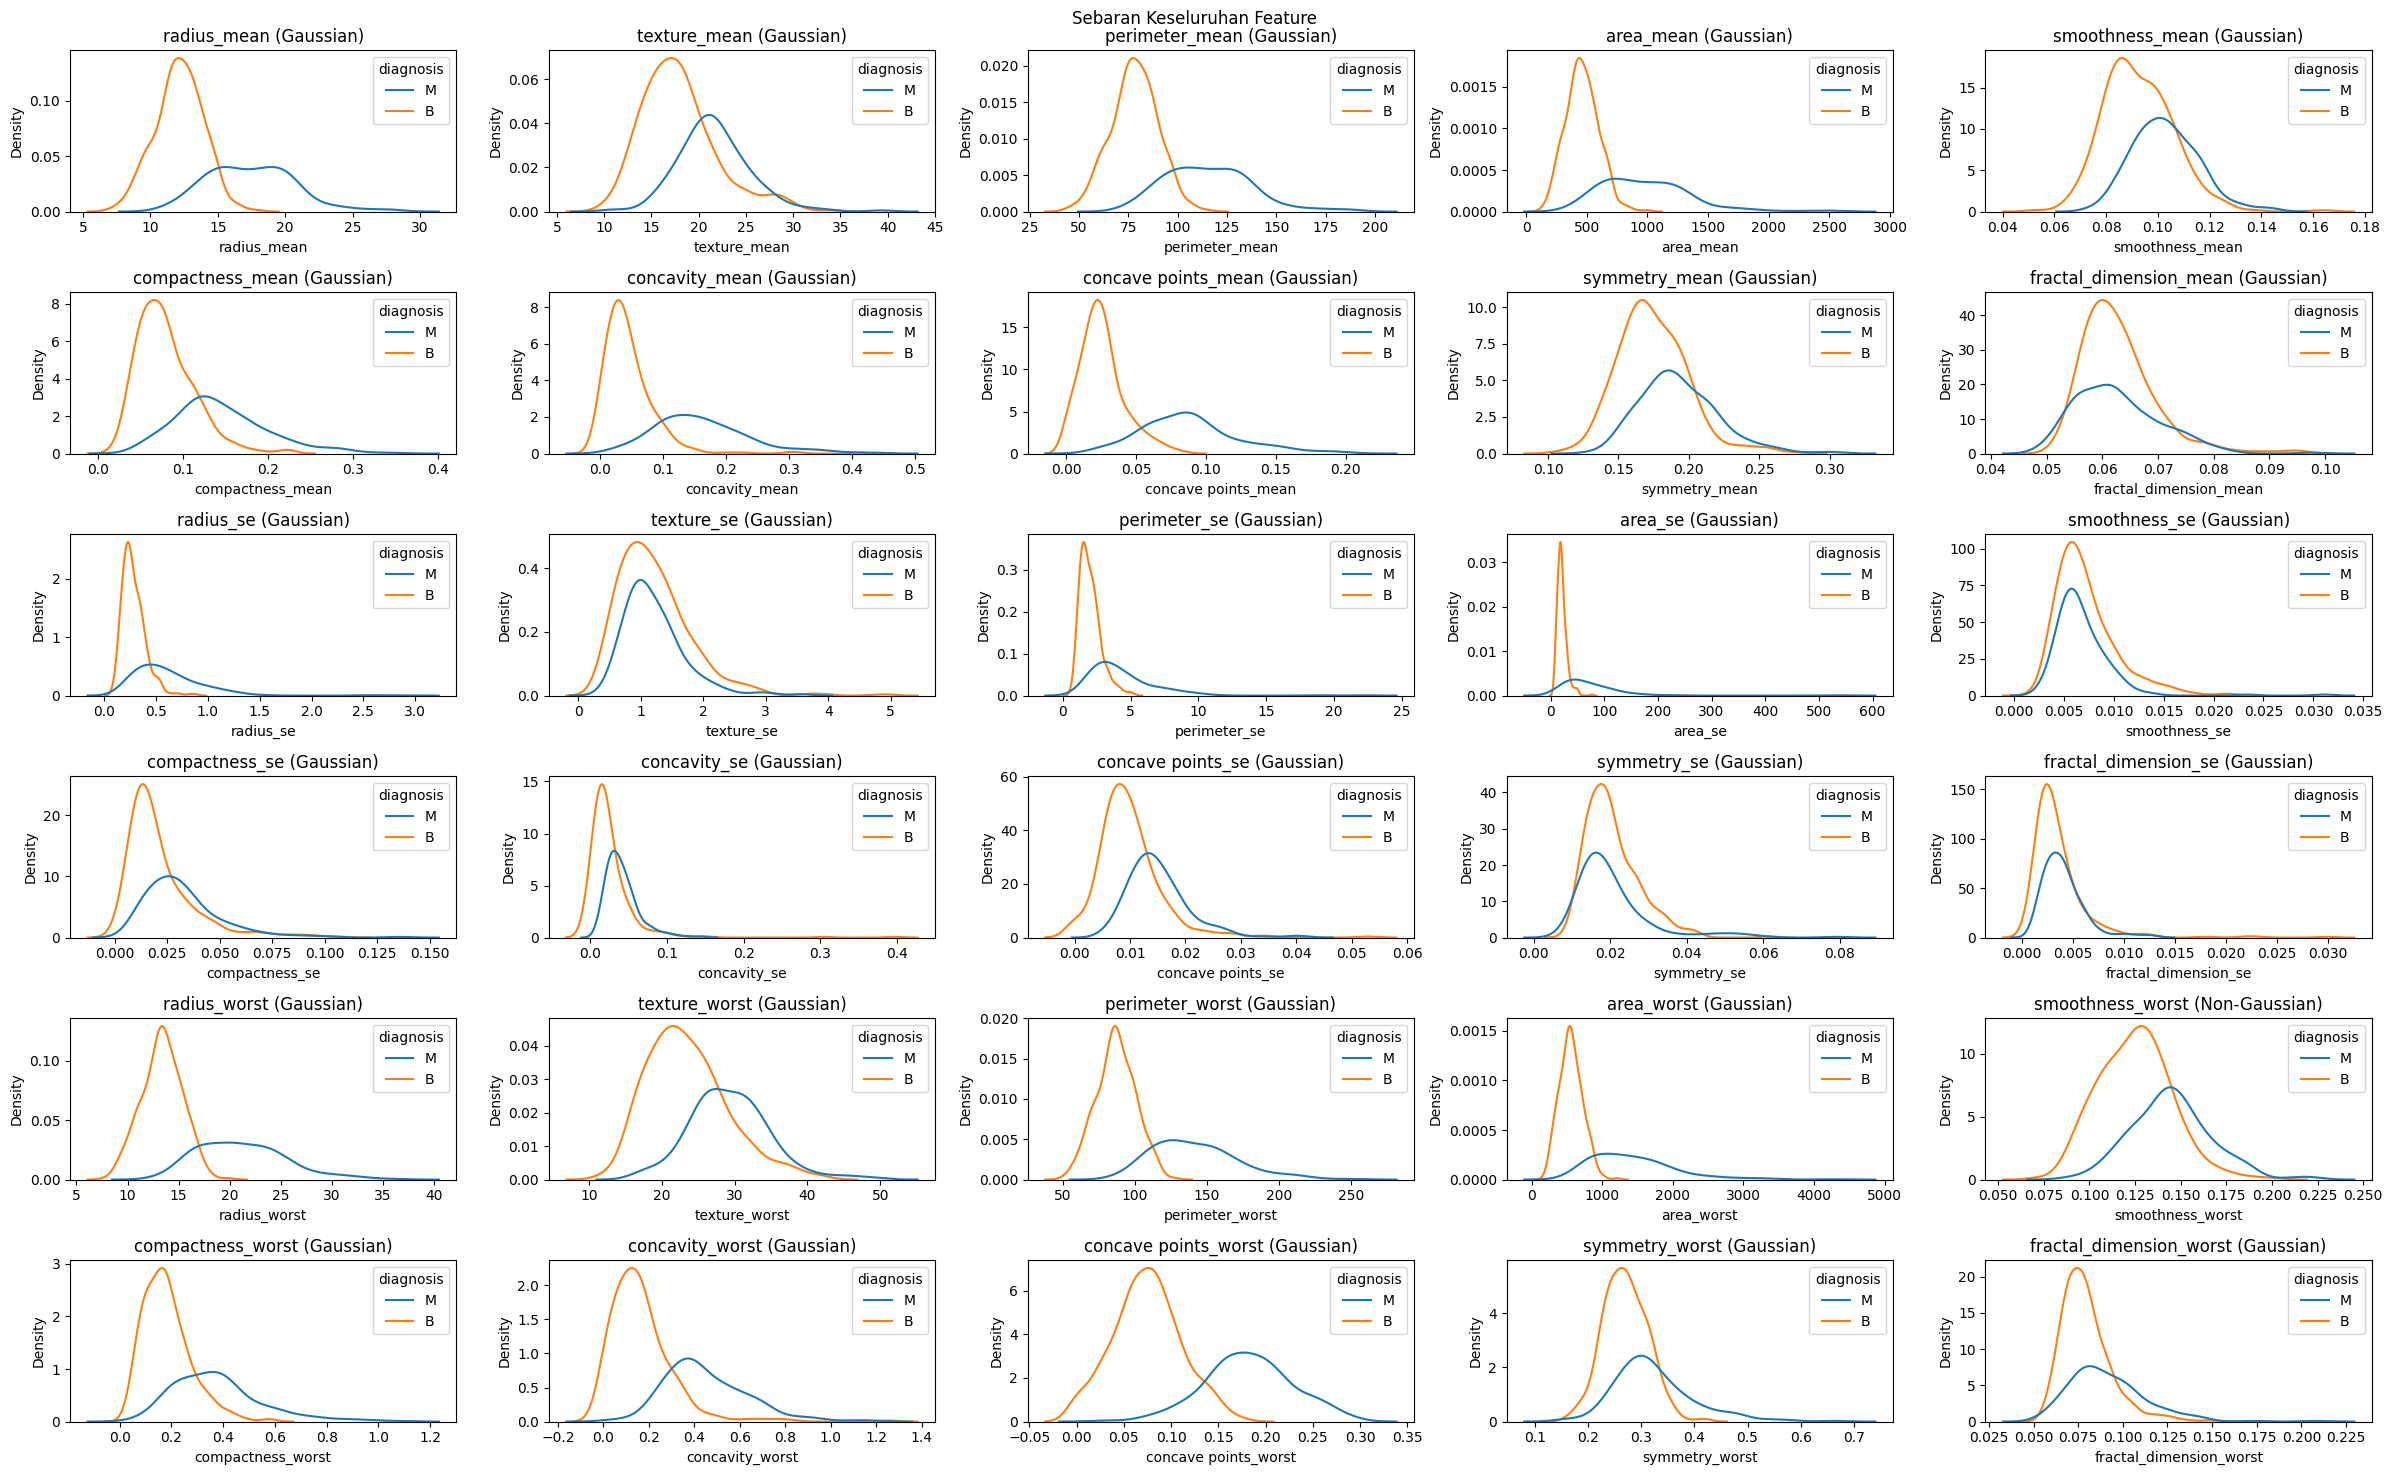

In [61]:
fig, ax = plt.subplots(6, 5, figsize=(24, 15))
ax = ax.flatten()

for column, axes in zip(features, ax):
    anderson_result = sp.anderson(df[column])
    rejection = anderson_result.statistic > anderson_result.critical_values[3]
    normal = 'Gaussian' if rejection else 'Non-Gaussian'
    sns.kdeplot(data=df, x=column, hue='diagnosis', ax=axes)
    axes.set_title(f"{column} ({normal})")

fig.suptitle("Sebaran Keseluruhan Feature")
plt.tight_layout()
plt.show()

In [62]:
significant_pairs = []
corr_coef = []
combinations = itertools.combinations(features, 2)
n = 0

for pair in combinations:
    n += 1
    pearson, _ = sp.pearsonr(df[pair[0]], df[pair[1]])
    spearman, _ = sp.spearmanr(df[pair[0]], df[pair[1]])

    if pearson >= 0.3 or spearman >= 0.3:
        significant_pairs.append(pair)
        corr_coef.append([pearson, spearman])

print(f"N-significant pairs: {len(significant_pairs)}")
print(f"Total pairs: {n}")
print(
    f"Percentage of Significant Pairs: {(100 * len(significant_pairs) / n):.2f}%")

N-significant pairs: 280
Total pairs: 435
Percentage of Significant Pairs: 64.37%


In [63]:
significant_pairs = []
corr_coef = []
combinations = itertools.combinations(features, 2)

for pair in combinations:
    pearson, _ = sp.pearsonr(df[pair[0]], df[pair[1]])
    spearman, _ = sp.spearmanr(df[pair[0]], df[pair[1]])

    if pearson >= 0.9 or spearman >= 0.9:
        significant_pairs.append(pair)
        corr_coef.append([pearson, spearman])

print(f"N-significant pairs: {len(significant_pairs)}")

N-significant pairs: 26


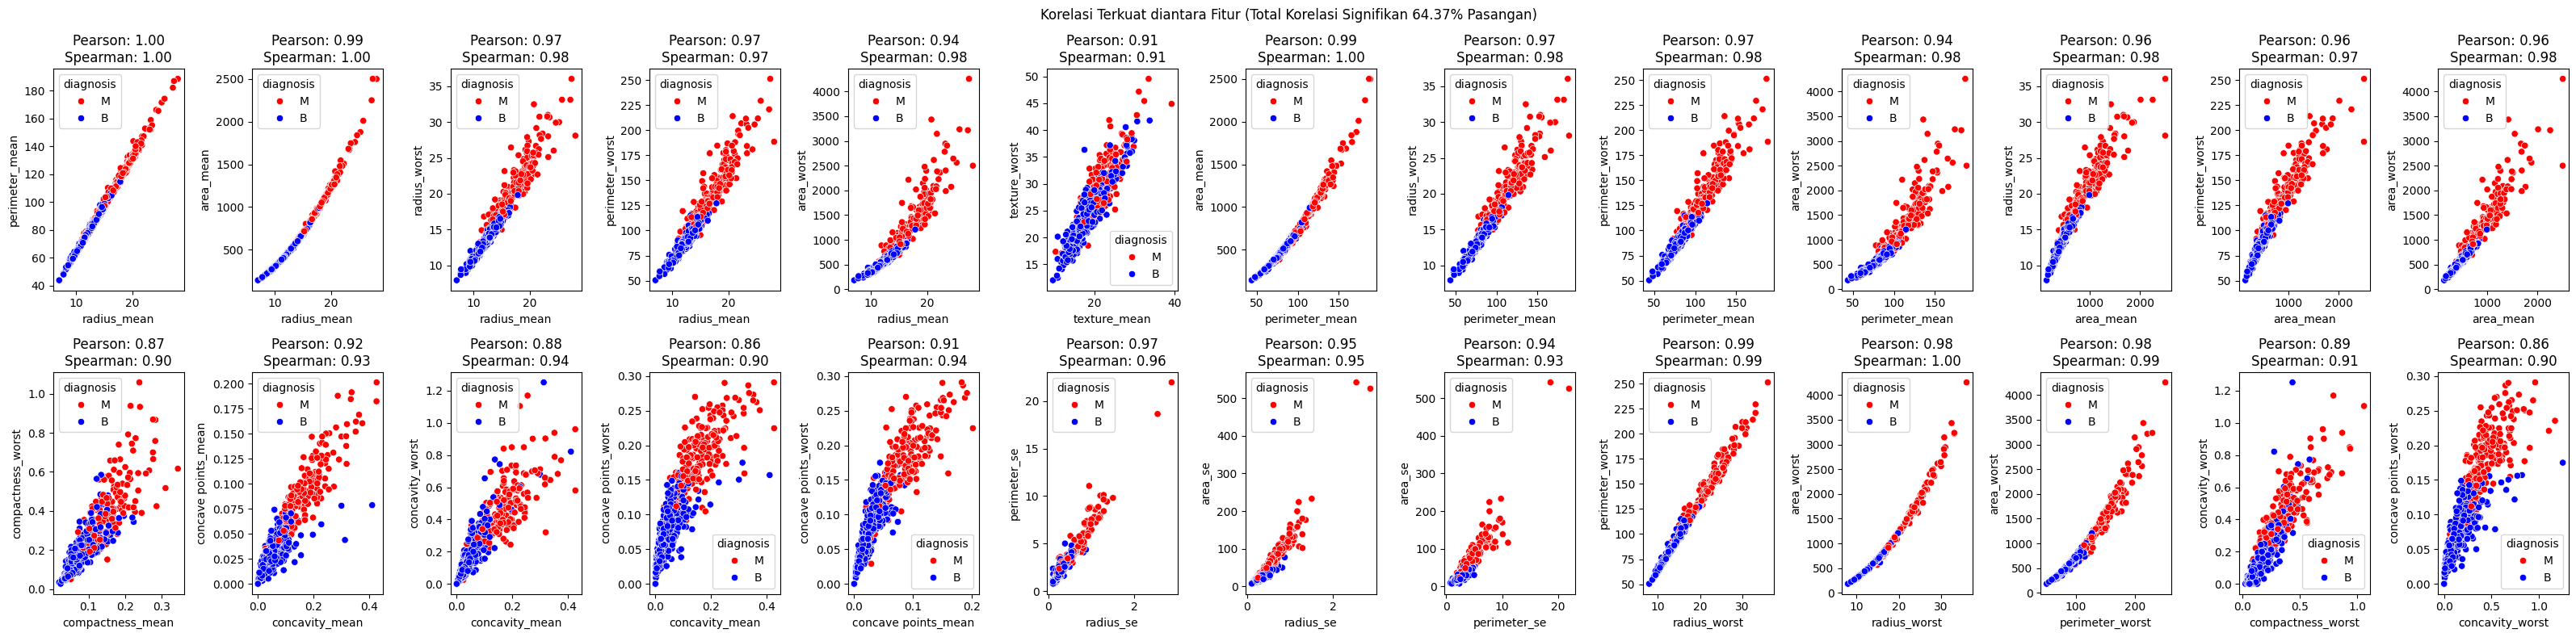

In [64]:
fig, ax = plt.subplots(2, 13, figsize=(32, 8))
ax = ax.flatten()

for i, pair in enumerate(significant_pairs):
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue='diagnosis', palette=[
                    'red', 'blue'], ax=ax[i])
    ax[i].set_title(
        f"Pearson: {corr_coef[i][0]:.2f}\nSpearman: {corr_coef[i][1]:.2f}")

fig.suptitle(
    "Korelasi Terkuat diantara Fitur (Total Korelasi Signifikan 64.37% Pasangan)")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**


Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:

1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.


In [78]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

target_column = 'diagnosis'

In [79]:
numeric_features = df.select_dtypes(
    include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

column_names = list(df.columns)
column_names.remove(target_column)

In [80]:
df_header = pd.DataFrame(columns=column_names)

df_header.to_csv("processed_data.csv", index=False)

In [81]:
if target_column in numeric_features:
    numeric_features.remove(target_column)

if target_column in categorical_features:
    categorical_features.remove(target_column)

In [82]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [83]:
features = df[column_names]
target = df[target_column]

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)

In [84]:
features_train = preprocessor.fit_transform(features_train)
features_test = preprocessor.transform(features_test)

In [88]:
final_names = [col for col in column_names]
final_names.extend([target_column])

combined_train = np.column_stack((features_train, target_train))

In [89]:
preprocess_data = pd.DataFrame(combined_train, columns=final_names)
preprocess_data.to_csv("processed_data.csv", index=False)

In [91]:
preprocess_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.107205,-0.146704,0.071764,0.104384,-0.802378,-0.409722,-0.339214,-0.390839,-0.927152,-0.662272,...,-0.323141,-0.013617,0.070965,-1.074665,-0.138206,-0.260229,-0.404911,-0.674033,-0.486887,B
1,0.021902,-0.428969,0.004024,0.01953,-1.240423,-0.268433,0.195302,-0.114699,-1.077263,-0.370992,...,-0.288369,-0.141201,-0.102835,-0.904499,0.225711,0.389971,-0.098327,-1.118969,-0.188684,B
2,0.326225,-0.876509,0.410463,0.295912,0.44782,1.374474,0.8526,0.542332,0.877116,1.526521,...,-0.817146,0.401276,0.22531,0.001579,0.793978,0.35679,0.119463,0.028729,0.578679,B
3,-0.08415,-0.440111,-0.115694,-0.080409,-0.803963,-0.560092,-0.23746,-0.194106,0.120677,-0.557986,...,-0.378297,-0.170153,-0.161201,-0.67719,-0.301892,-0.185665,-0.17531,0.318969,-0.518456,B
4,0.079539,0.841226,0.040577,0.072597,-0.114399,-0.354487,-0.329675,-0.181716,-0.364974,-0.397363,...,0.471823,-0.004048,0.078192,-0.3015,-0.29623,-0.452232,-0.285241,-0.243831,-0.516513,B


In [92]:
preprocess_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,398.00000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.0000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,338.00000,349.000000,375.000000,380.000000,346.000000,380.000000,387.000000,384.000000,324.000000,363.000000,...,361.000000,367.000000,383.000000,316.0000,378.000000,383.000000,350.000000,368.000000,380.000000,2
top,-0.25245,-0.230269,-0.113011,-0.185736,1.076618,1.171995,-0.634732,-0.640323,-0.550405,-0.557986,...,0.252398,0.200086,0.034093,-0.3015,-0.139236,-0.843322,-1.028545,-0.646041,0.399466,B
freq,3.00000,3.000000,3.000000,2.000000,4.000000,2.000000,6.000000,6.000000,4.000000,3.000000,...,3.000000,3.000000,2.000000,4.0000,2.000000,6.000000,6.000000,3.000000,2.000000,249
